# Data Understanding
## Data Quality
Now we're going to analyze the quality of the data we were given.


## Data Summarization
In this section, we will provide an overview of key properties of the data which will help in selecting the most suitable tool for analyzing the data. Specifically, we are going to do a statistical analysis of all tables in the dataset. But first we need to import pandas and matplotlib which will aid us in the calculation of statistical values and data visualization, respectively.

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

### Relation `account`
Firstly, we are going to open the account table and look at its first few lines. 

As we can see there is one categorical variable representing how often account balances are issued for each account. All other variables are numerical as they correspond to account and district IDs or the timestamp of account creation.

In [52]:
# show the first few lines of the dataframe
account_df = pd.read_csv('./data/account.csv', sep=';')
account_df.head()

,account_id,district_id,frequency,date
0,576,55,monthly issuance,930101
1,3818,74,monthly issuance,930101
2,704,55,monthly issuance,930101
3,2378,16,monthly issuance,930101
4,2632,24,monthly issuance,930102


Now, we are going to check for null values in the account table. The output of the following snippet of code shows there are no such values.

In [53]:
# show how many null values each column has
account_df.isna().sum()

account_id     0
district_id    0
frequency      0
date           0
dtype: int64

Next, we are going to make sure that each account appears exactly once. The output of the following snippet of code shows that each account appears exactly once.

In [54]:
# show the number of duplicate values in the account_id column
account_df['account_id'].duplicated().any()

False

Now, we are going to calculate how many accounts exist in each district and the mode. As we can see from the output of the following snippets of code, the district where the highest number of accounts are registered in is district 1, having 3.6 times the number of accounts as the next district. In fact the boxplot shows that there are 7 outliers (districts 1, 70, 74, 54, 64, 72, 68), given that the average district has 58 accounts, the first quartile is at 42 and the third quartile is at 53 which gives an interquartile range of 11. These districts will skew the data if no correction is done.

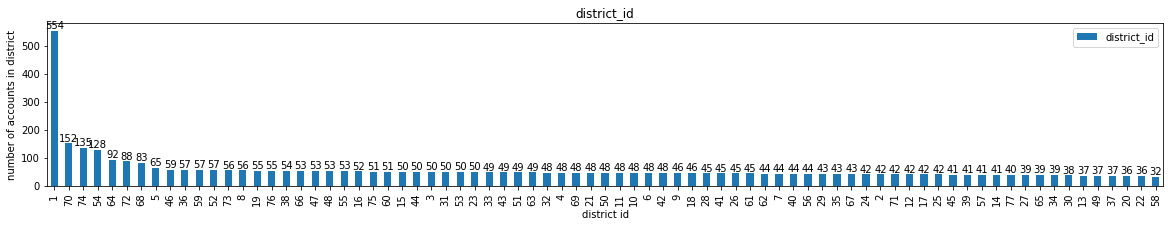

In [55]:
# plot the distribution of accounts in each district
district_values = account_df['district_id'].value_counts()
ax = district_values.sort_values(ascending=False).plot.bar(
    title='district_id',
    legend=True,
    xlabel='district id',
    ylabel='number of accounts in district',
    figsize=(20, 3)
)
ax.bar_label(ax.containers[0])
plt.show()

In [56]:
# compute the mode of the district_id (the district with the highest number of accounts)
account_df['district_id'].mode()

0    1
dtype: int64

In [57]:
# compute the count, mean, standard deviation, minimum and maximum and quartiles for the number of accoutns in each district
acc_description = district_values.describe()
acc_description

count     77.000000
mean      58.441558
std       60.716445
min       32.000000
25%       42.000000
50%       48.000000
75%       53.000000
max      554.000000
Name: district_id, dtype: float64

<AxesSubplot:>

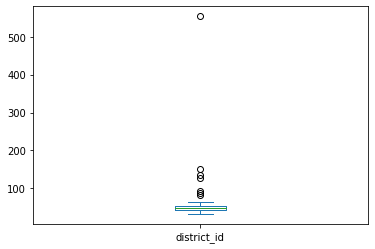

In [58]:
# draw a boxplot of the number of accounts in each district to show the outliers
account_df['district_id'].value_counts().plot.box()

Now, we are going to calculate the mode of the issuance column which shows that the most common frequency for issuance of bank statements is `monthly issuance`, with 4167 occurrences. Other types of issuance include `weekly issuance` with 240 entries and `ìssuance after transaction` with 93 entries.

In [59]:
# calculate the most common frequency for issuance of bank statements
account_df['frequency'].mode()

0    monthly issuance
dtype: object

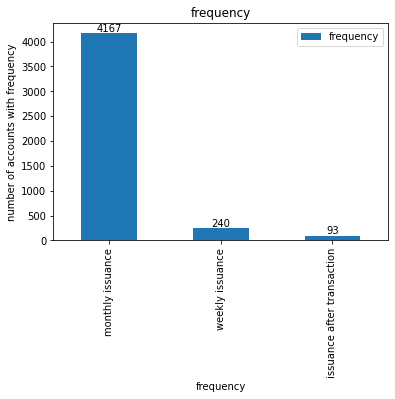

In [60]:
# draw a barplot of the number of occurrences of each frequency
freq_values = account_df['frequency'].value_counts()
ax = freq_values.sort_values(ascending=False).plot.bar(
    title='frequency',
    legend=True,
    xlabel='frequency',
    ylabel='number of accounts with frequency',
)
ax.bar_label(ax.containers[0])
plt.show()

## Relation `client`
We are now going to open the client table and look at its first few lines. 

As we can see this table only contains numerical variables: the ID of the client and the district where they live, as well as a birth number which not only encodes the client's birth date but also their gender (for men, the format is YYMMDD and for women, the format is YYMM+50DD). 

In [61]:
# show the first few lines of the dataframe
client_df = pd.read_csv('./data/client.csv', sep=';')
client_df.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


Now, we are going to check for null values in the client table. The output of the following snippets of code shows there are no such values and that there are no repeated clients.

In [62]:
# show how many null values each column has
client_df.isna().sum()

client_id       0
birth_number    0
district_id     0
dtype: int64

In [63]:
# show the number of duplicate values in the client_id column
client_df['client_id'].duplicated().any()

False

In [64]:
# compute the count, mean, standard deviation, minimum and maximum and quartiles for the number of clients in each district
client_df['district_id'].value_counts().describe()

count     77.000000
mean      69.727273
std       72.741727
min       43.000000
25%       51.000000
50%       56.000000
75%       63.000000
max      663.000000
Name: district_id, dtype: float64

## Relation `disposition`
We are now going to open the disposition table and look at its first few lines. 

As we can see this table contains numerical variables: the ID of the client and of the account, as well as the disposition ID. This table also contains a categorical variable containing the type of disposition (`OWNER`, `DISPONENT`). This table contains no null values. There are 4500 owners and 869 disponents.

In [65]:
# show the first few lines of the dataframe
disp_df = pd.read_csv('./data/disp.csv', sep=';')
disp_df.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [66]:
# show how many null values each column has
disp_df.isna().sum()

disp_id       0
client_id     0
account_id    0
type          0
dtype: int64

In [67]:
# show the types of disponent in the dataset
disp_df['type'].unique()

array(['OWNER', 'DISPONENT'], dtype=object)

OWNER        4500
DISPONENT     869
Name: type, dtype: int64


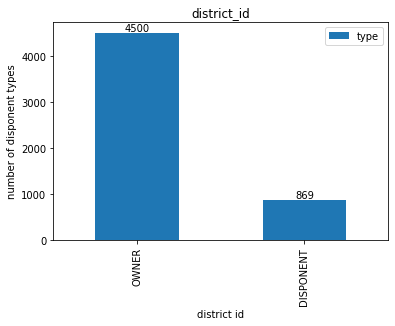

In [68]:
# draw a barplot of the number of occurrences of each disposition type
type_values = disp_df['type'].value_counts()
print(type_values)
ax = type_values.sort_values(ascending=False).plot.bar(
    title='district_id',
    legend=True,
    xlabel='district id',
    ylabel='number of disponent types',
)
ax.bar_label(ax.containers[0])
plt.show()

## Relations `transaction` and `permanent order`
The permanent order relation is included in the transaction table, specifically, in rows that contain the two-letter code of the destination bank of a transaction. Other rows that do not correspond to permanent orders do not contain these attributes, which explains the large number of null values in this table.
This relation is split between two tables, a dataset for training purposes and another one for testing purposes. However for the purpose of this analysis we will append them together.

There are three transaction types (categorical variables): `credit`, `withdrawal` and `withdrawal in cash`. The most common transaction type is `credit`. 
There are five operation types (categorical variables): `credit in cash`, `collection from another bank`, `withdrawal in cash`, `remittance to another bank`, `credit card withdrawal`. The most common operation type is `withdrawal in cash`.

The mean transaction amount is 5911.10, the minimum transaction amount is 0 and the maximum transaction amount is 86400. The box plot shows that there are many outliers to this distribution, given that the interquartile range is 6615.6.

In [69]:
# show the first few lines of the dataframe
trans_train_df = pd.read_csv('./data/trans_train.csv', sep=';', dtype={'k_symbol': str, 'bank': str})
trans_test_df = pd.read_csv('./data/trans_test.csv', sep=';', dtype={'k_symbol': str, 'bank': str})
trans_df = trans_train_df.append(trans_test_df)
trans_df.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,930113,credit,credit in cash,800.0,800.0,NaN,NaN,NaN
1,1548750,5270,930114,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0
2,3393738,11265,930114,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,3122924,10364,930117,credit,credit in cash,1100.0,1100.0,NaN,NaN,NaN
4,1121963,3834,930119,credit,credit in cash,700.0,700.0,NaN,NaN,NaN


In [70]:
# show how many null values each column has
trans_df.isna().sum()

trans_id           0
account_id         0
date               0
type               0
operation      75891
amount             0
balance            0
k_symbol      202663
bank          323820
account       315517
dtype: int64

In [71]:
# show the unique categories of transaction types
trans_df['type'].unique()

array(['credit', 'withdrawal', 'withdrawal in cash'], dtype=object)

In [72]:
# show the most common transaction type
trans_df['type'].mode()

0    withdrawal
dtype: object

In [73]:
# show the unique categories of transaction operation
trans_df['operation'].unique()

array(['credit in cash', 'collection from another bank', nan,
       'withdrawal in cash', 'remittance to another bank',
       'credit card withdrawal'], dtype=object)

In [74]:
# show the most common transaction operation
trans_df['operation'].mode()

0    withdrawal in cash
dtype: object

In [75]:
# compute the count, mean, standard deviation, minimum and maximum and quartiles for the amount of money in a transaction
trans_df['amount'].describe()

count    426885.000000
mean       5911.104212
std        9496.324833
min           0.000000
25%         132.400000
50%        2040.000000
75%        6748.000000
max       86400.000000
Name: amount, dtype: float64

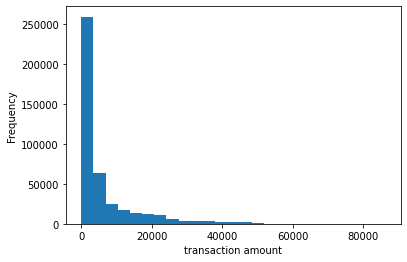

In [128]:
# plot a histogram of the distribution of transaction amounts
trans_df['amount'].plot.hist(bins=25)
plt.xlabel('transaction amount')
plt.show()

<AxesSubplot:>

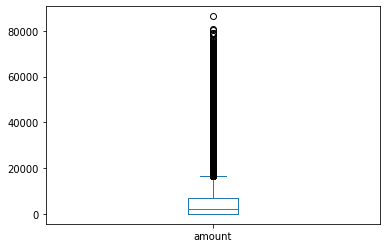

In [77]:
# draw a boxplot of the distribution of transaction amounts
trans_df['amount'].plot.box()

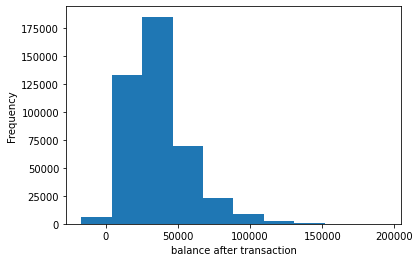

In [127]:
trans_df['balance'].plot.hist()
plt.xlabel('balance after transaction')
plt.show()

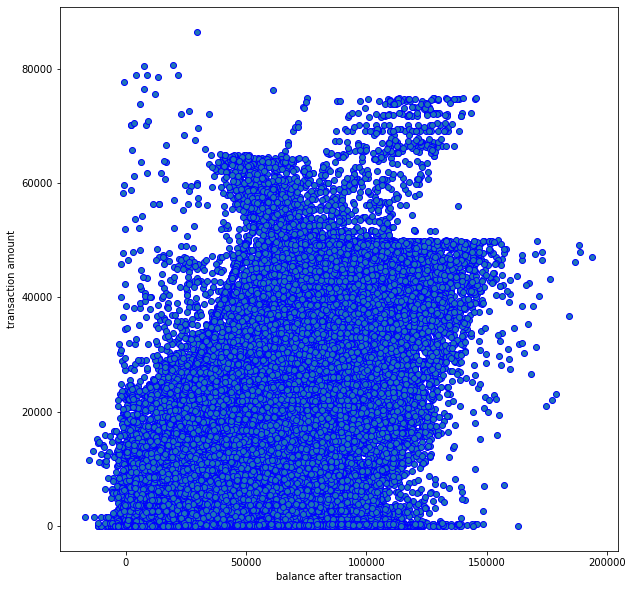

In [118]:
plt.figure(figsize=(10,10))
plt.scatter(trans_df['balance'], trans_df['amount'], edgecolors='b')
plt.xlabel('balance after transaction')
plt.ylabel('transaction amount')
plt.show()

## Relation `loan`
We are now going to open the loan table and look at its first few lines. This relation is split between two tables, one for training purposes and another one for testing purposes. However for the purpose of this analysis we will append them.

This table contains numerical variables representing the IDs for the loans and the accounts that requested them as well as the date of the day the loan was granted and the amount of money borrowed. Each row also has information on the number of payments made on the loan and the duration of the loan. Because the purpose of this project is to predict whether a loan will be paid or not, this table contains the `status` attribute which, for the train table, says if the loan has been paid or not. This attribute is empty for the test table because it is what we want to predict.

Loans can have a duration of 12, 36, 60, 24 or 48 months. The average loan duration is 36 months.

As expected, there are 354 null values in the table, all in the status column, which corresponds to the number of rows in the test table.

Also as expected, the correlogram shows a significant positive correlation between the amount of the loan and the number of payments.

The average loan amount is 151410.17 with a standard deviation of 113372.40, the smallest loan has an amount of 4980 and the largest, an amount of 590820.
The average payment is 4190.66 with a standard deviation of 2215.83, the smallest payment is 304 and the largest is 9910.

The boxplot for the ``amount`` column shows that there are many outliers but the boxplot for the ``payments`` column shows none. The amount column seems to follow a Pareto distribution.

In [78]:
# show the first few lines of the dataframe
loan_train_df = pd.read_csv('./data/loan_train.csv', sep=';')
loan_test_df = pd.read_csv('./data/loan_test.csv', sep=';')
loan_df = loan_train_df.append(loan_test_df)
loan_df.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,-1.0
1,5316,1801,930711,165960,36,4610,1.0
2,6863,9188,930728,127080,60,2118,1.0
3,5325,1843,930803,105804,36,2939,1.0
4,7240,11013,930906,274740,60,4579,1.0


In [79]:
# show how many null values each column has
loan_df.isna().sum()

loan_id         0
account_id      0
date            0
amount          0
duration        0
payments        0
status        354
dtype: int64

In [80]:
loan_df['duration'].mean()

36.49266862170088

Now we will look at the ``amount`` column of the table.

In [81]:
corr = loan_df.corr()
corr

,loan_id,account_id,date,amount,duration,payments,status
loan_id,1.000000,0.999860,-0.070908,-0.042968,0.010287,-0.056171,0.121917
account_id,0.999860,1.000000,-0.069932,-0.043268,0.009986,-0.056067,0.122633
date,-0.070908,-0.069932,1.000000,0.074214,0.088877,0.000727,0.029130
amount,-0.042968,-0.043268,0.074214,1.000000,0.612402,0.689481,-0.128237
duration,0.010287,0.009986,0.088877,0.612402,1.000000,-0.040189,-0.003537
payments,-0.056171,-0.056067,0.000727,0.689481,-0.040189,1.000000,-0.168436
status,0.121917,0.122633,0.029130,-0.128237,-0.003537,-0.168436,1.000000


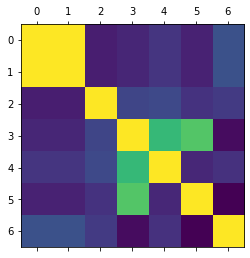

In [82]:
plt.matshow(corr)

In [83]:
loan_df['amount'].describe()

count       682.000000
mean     151410.175953
std      113372.406310
min        4980.000000
25%       66732.000000
50%      116928.000000
75%      210654.000000
max      590820.000000
Name: amount, dtype: float64

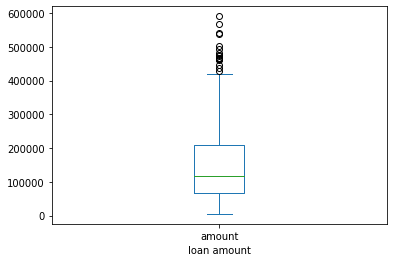

In [123]:
loan_df['amount'].plot.box()
plt.xlabel('loan amount')
plt.show()

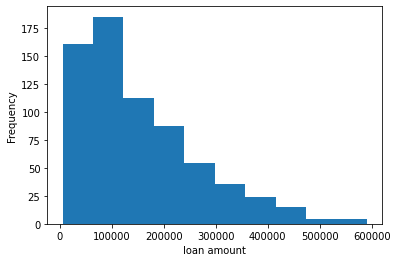

In [114]:
loan_df['amount'].plot.hist()
plt.xlabel('loan amount')
plt.show()

Now we will look at the ``payments`` column of the table.

In [86]:
loan_df['payments'].describe()

count     682.000000
mean     4190.664223
std      2215.830344
min       304.000000
25%      2477.000000
50%      3934.000000
75%      5813.500000
max      9910.000000
Name: payments, dtype: float64

Text(0.5, 0, 'number of payments')

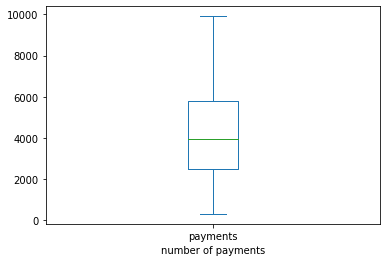

In [122]:
loan_df['payments'].plot.box()
plt.xlabel('number of payments')

<AxesSubplot:ylabel='Frequency'>

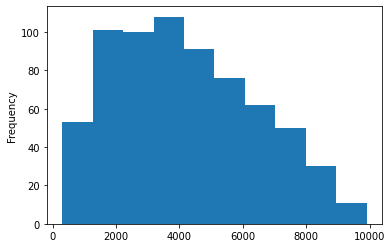

In [88]:
loan_df['payments'].plot.hist()

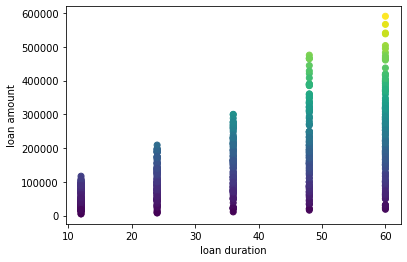

In [115]:
plt.scatter(loan_df['duration'], loan_df['amount'], c=loan_df['amount'], cmap='viridis')
plt.ylabel('loan amount')
plt.xlabel('loan duration')
plt.show()

## Relation `credit card`
We are now going to open the loan table and look at its first few lines. This relation is split between two tables, one for training purposes and another one for testing purposes. However for the purpose of this analysis we will append them.

Each row in the table contains attributes describing a card. Each card is linked to a ``disp_id`` attribute that can be used to get the ID user that owns the card and the account it is associated to. There is also an attribute representing the type of card which can be one of ``classic``, ``junior`` or ``gold``. There are 254 ``classic`` cards, 82 ``junior`` cards and 18 ``gold`` cards. There are very few cards compared to the number of accounts.

In [89]:
card_train_df = pd.read_csv('./data/card_train.csv', sep=';')
card_test_df = pd.read_csv('./data/card_test.csv', sep=';')
card_df = card_train_df.append(card_train_df)
card_df.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107
1,104,588,classic,940119
2,747,4915,classic,940205
3,70,439,classic,940208
4,577,3687,classic,940215


In [90]:
card_df.isna().sum()

card_id    0
disp_id    0
type       0
issued     0
dtype: int64

In [91]:
card_df['type'].unique()

array(['classic', 'junior', 'gold'], dtype=object)

In [92]:
card_df['type'].value_counts()

classic    254
junior      82
gold        18
Name: type, dtype: int64

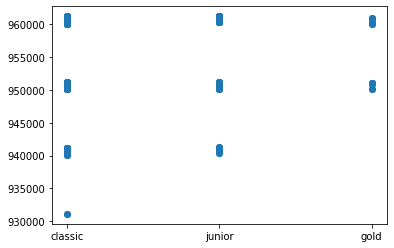

In [93]:
plt.scatter(card_df['type'], card_df['issued'])

<AxesSubplot:>

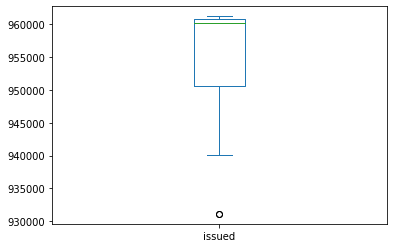

In [94]:
card_df['issued'].plot.box()

## Relation `demographic data`
We are now going to open the district table and look at its first few lines. 

This table contains information regarding the various districts where the bank operates. It contains null values represented by a ``?``. 

In [95]:
district_df = pd.read_csv('./data/district.csv', sep=';', na_values='?')
district_df.head()

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677.0,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159.0,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824.0,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244.0,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616.0,3040


In [96]:
district_df.isna().sum()

code                                                 0
name                                                 0
region                                               0
no. of inhabitants                                   0
no. of municipalities with inhabitants < 499         0
no. of municipalities with inhabitants 500-1999      0
no. of municipalities with inhabitants 2000-9999     0
no. of municipalities with inhabitants >10000        0
no. of cities                                        0
ratio of urban inhabitants                           0
average salary                                       0
unemploymant rate '95                                1
unemploymant rate '96                                0
no. of enterpreneurs per 1000 inhabitants            0
no. of commited crimes '95                           1
no. of commited crimes '96                           0
dtype: int64

The null values correspond to the unemployment rate and number of commited crimes in the year 1995 for the Jesenik district. These values can be imputed using the average of these values for the remaining districts. There is not enough data for learning-based or regression-based approaches.

In [97]:
district_df.loc[district_df['unemploymant rate \'95 '].isnull() & district_df['no. of commited crimes \'95 '].isnull()]

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
68,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,NaN,7.01,124,NaN,1358


When looking at the correlation matrix for the demographic data, we can see multiple hotspots which show some interesting insights about the country where the bank operates. For example, the number of crimes seems to be positively correlated to the number of people living in the district and the crime rate for 1996 is also positively correlated with the crime rate for 1995 (similar for the unemployment rate). Other insights include:
* the larger the municipality the more urban it is, the higher the average salary
* the higher the average salary, the higher the number of enterpreneurs
* the average salary is positively correlated to the number of commited crimes

In [98]:
district_df.corr()

,code,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
code,1.000000,0.024198,-0.192888,0.351801,0.346569,0.277642,0.022941,0.007019,-0.256033,0.420173,0.436070,-0.455890,-0.104766,-0.129428
no. of inhabitants,0.024198,1.000000,-0.306117,-0.194369,-0.098136,0.043197,-0.273442,0.453271,0.639834,-0.095925,-0.116989,0.264873,0.978009,0.972490
no. of municipalities with inhabitants < 499,-0.192888,-0.306117,1.000000,0.214798,-0.165852,-0.207606,0.052394,-0.452779,-0.341332,-0.164730,-0.197596,-0.085878,-0.308566,-0.280440
no. of municipalities with inhabitants 500-1999,0.351801,-0.194369,0.214798,1.000000,0.577452,0.082513,0.340066,-0.632699,-0.403481,-0.014872,-0.061180,-0.093302,-0.293142,-0.276912
no. of municipalities with inhabitants 2000-9999,0.346569,-0.098136,-0.165852,0.577452,1.000000,0.041362,0.502612,-0.351328,-0.189056,-0.032356,-0.035110,-0.140230,-0.206444,-0.205466
no. of municipalities with inhabitants >10000,0.277642,0.043197,-0.207606,0.082513,0.041362,1.000000,0.243540,0.254950,-0.029226,0.445780,0.421098,-0.346697,-0.025600,-0.030997
no. of cities,0.022941,-0.273442,0.052394,0.340066,0.502612,0.243540,1.000000,-0.037301,-0.275483,-0.089282,-0.123141,-0.046059,-0.321132,-0.303608
ratio of urban inhabitants,0.007019,0.453271,-0.452779,-0.632699,-0.351328,0.254950,-0.037301,1.000000,0.599725,0.165982,0.159183,0.041719,0.442074,0.416620
average salary,-0.256033,0.639834,-0.341332,-0.403481,-0.189056,-0.029226,-0.275483,0.599725,1.000000,-0.063806,-0.090869,0.269185,0.652244,0.634388
unemploymant rate '95,0.420173,-0.095925,-0.164730,-0.014872,-0.032356,0.445780,-0.089282,0.165982,-0.063806,1.000000,0.981521,-0.535190,-0.131764,-0.143824


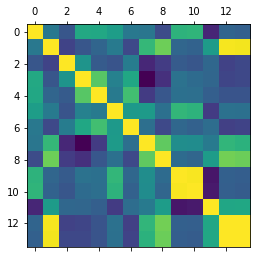

In [99]:
plt.matshow(district_df.corr())